In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/mymoviedb.csv', lineterminator='\n')

In [3]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [10]:
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [11]:
print(df['Release_Date'].dtype)

datetime64[ns]


In [12]:
df['Release_Date'] = df['Release_Date'].dt.year

In [13]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis=1, inplace= True)

In [15]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"


In [16]:

bins = [0, 5, 7, 10]
labels = ['below_avg', 'avg', 'popular']

# Create a new column 'Vote_Category' based on 'Vote_Average'
df['Vote_Category'] = pd.cut(df['Vote_Average'], bins=bins, labels=labels, right=False)

# Display the first few rows with the new column
display(df.head())

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",popular


In [17]:
display(df.tail(10))

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Category
9817,2005,I'm in Love With My Little Sister,13.360,9,5.7,"Romance, Animation, Drama",avg
9818,2013,All Is Lost,13.359,1319,6.6,"Action, Adventure, Drama",avg
9819,2008,Amateur Porn Star Killer 2,13.359,14,5.4,"Crime, Horror",avg
9820,1992,Unlawful Entry,13.358,199,6.1,"Crime, Thriller, Mystery",avg
9821,1974,The Little Prince,13.357,89,6.6,"Science Fiction, Fantasy, Family, Music",avg
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime",popular
9823,2020,Violent Delights,13.356,8,3.5,Horror,below_avg
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror",avg
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History",avg
9826,1984,Threads,13.354,186,7.8,"War, Drama, Science Fiction",popular


In [20]:
df.drop('Vote_Average', axis=1, inplace=True)

In [21]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,Thriller,avg
3,2021,Encanto,2402.201,5076,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,"Action, Adventure, Thriller, War",popular


In [22]:
df['Vote_Category'].value_counts()

,count
Vote_Category,
avg,6007
popular,3226
below_avg,593


In [24]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Genre,0
Vote_Category,0


In [25]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,Thriller,avg
3,2021,Encanto,2402.201,5076,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,"Action, Adventure, Thriller, War",popular


In [28]:
df_genres = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre').reset_index(drop=True)
df_genres.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular
3,2022,The Batman,3827.658,1151,Crime,popular
4,2022,The Batman,3827.658,1151,Mystery,popular


In [30]:
df_genres['Genre'] = df_genres['Genre'].astype('category')
df_genres.head()
df_genres['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [31]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25791 entries, 0 to 25790
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Release_Date   25791 non-null  int32   
 1   Title          25791 non-null  object  
 2   Popularity     25791 non-null  float64 
 3   Vote_Count     25791 non-null  int64   
 4   Genre          25791 non-null  category
 5   Vote_Category  25791 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.5+ KB


In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Most frequence of movie


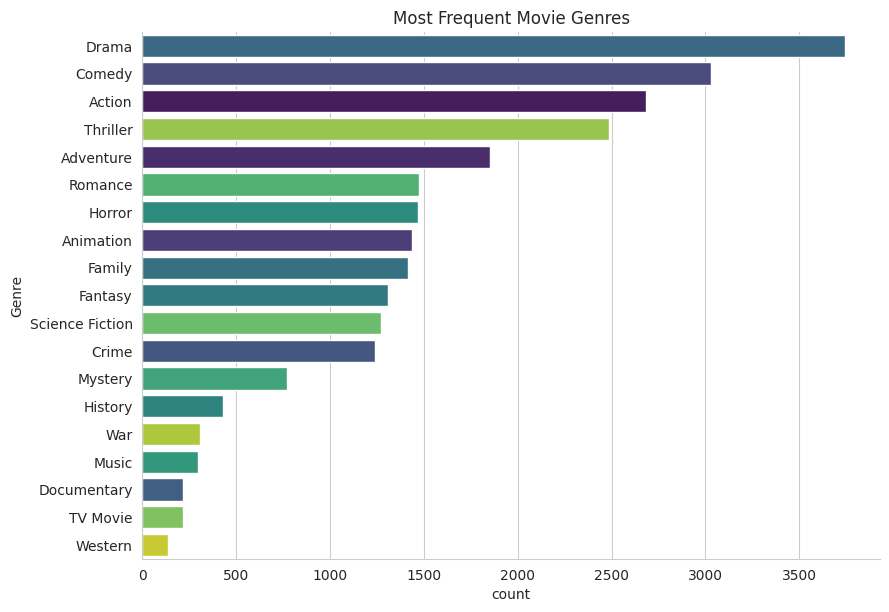

In [42]:
genre_counts = df_genres['Genre'].value_counts().index
sns.catplot(y='Genre', data=df_genres, kind='count', height=6, aspect=1.5, order=genre_counts, palette='viridis', hue='Genre', legend=False)
plt.title('Most Frequent Movie Genres')
plt.show()

# Highest Votes

/tmp/ipython-input-912868259.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_votes = df_genres.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)
/tmp/ipython-input-912868259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='plasma')


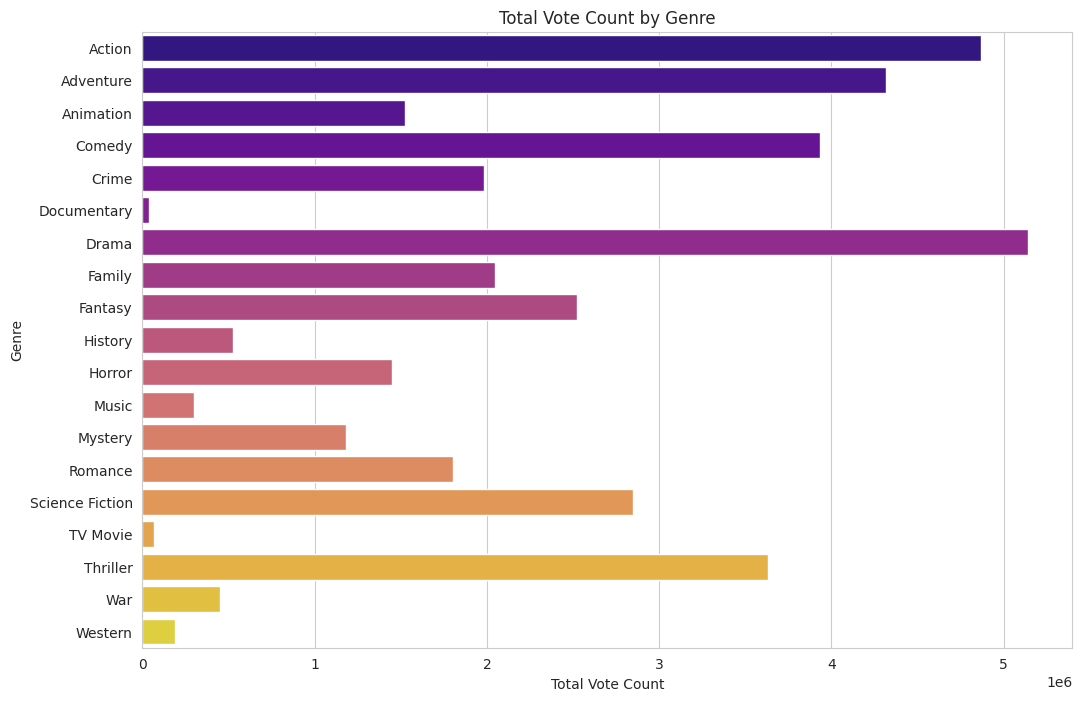

In [45]:
genre_votes = df_genres.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='plasma')
plt.title('Total Vote Count by Genre')
plt.xlabel('Total Vote Count')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-1320331584.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_popularity = df_genres.groupby('Genre')['Popularity'].max().sort_values(ascending=False)


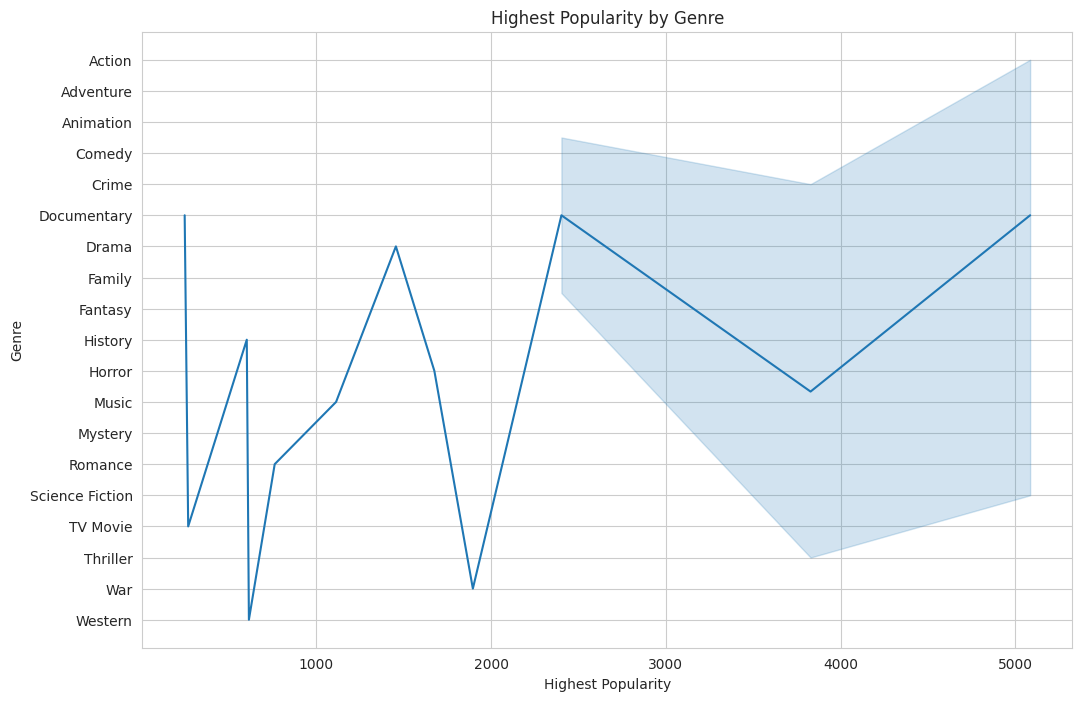

In [46]:
genre_popularity = df_genres.groupby('Genre')['Popularity'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.lineplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Highest Popularity by Genre')
plt.xlabel('Highest Popularity')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-3371057676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette='viridis')


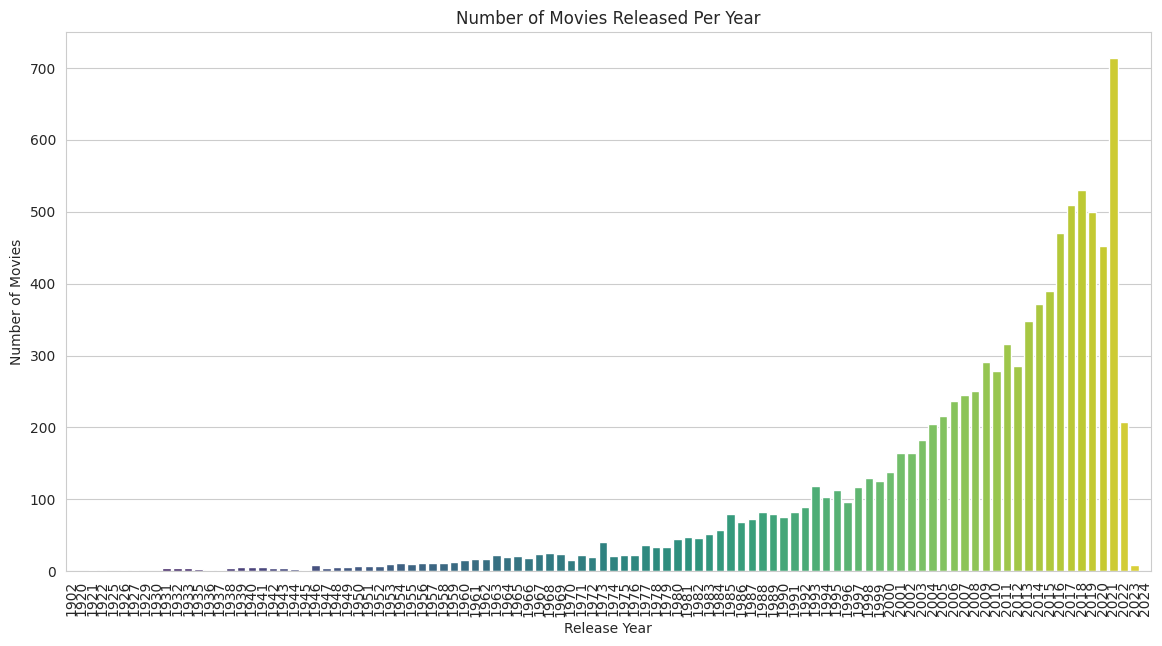

In [47]:
movies_per_year = df['Release_Date'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, palette='viridis')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-1977000886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_year_binned.index.astype(str), y=movies_per_year_binned.values, palette='viridis')


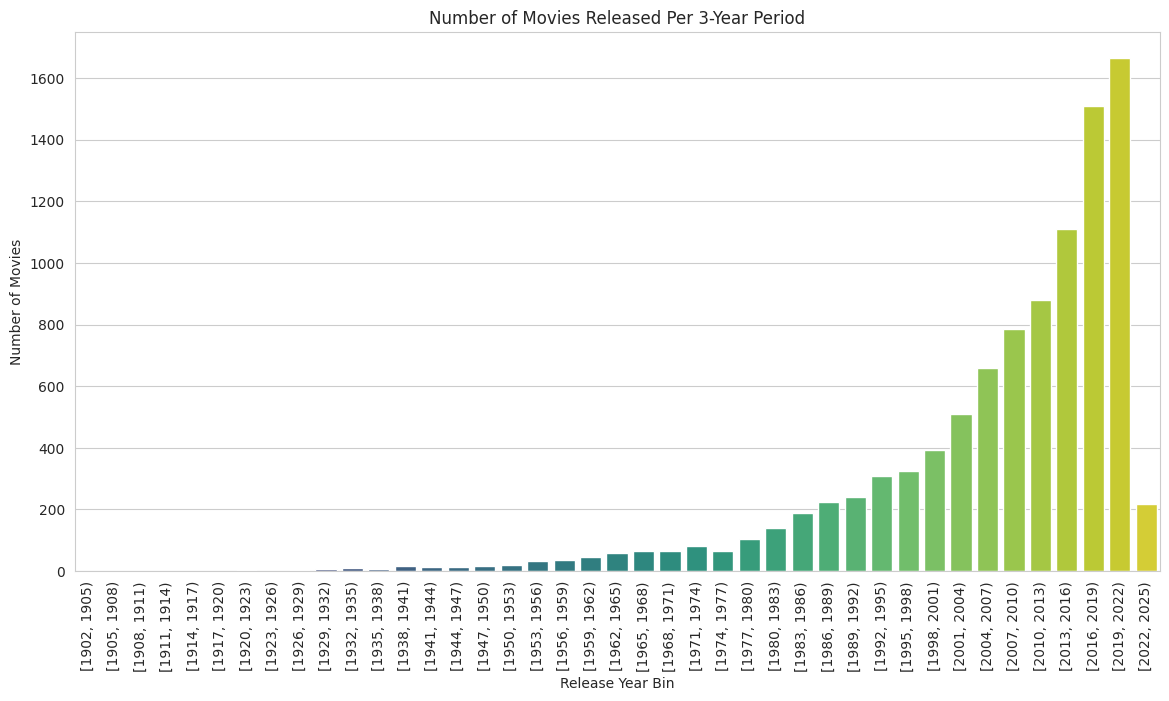

In [48]:
df['Release_Year_Binned'] = pd.cut(df['Release_Date'], bins=range(df['Release_Date'].min(), df['Release_Date'].max() + 4, 3), right=False)

movies_per_year_binned = df['Release_Year_Binned'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
sns.barplot(x=movies_per_year_binned.index.astype(str), y=movies_per_year_binned.values, palette='viridis')
plt.title('Number of Movies Released Per 3-Year Period')
plt.xlabel('Release Year Bin')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()